In [1]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import KFold
import sklearn.model_selection as slms
from sklearn.neighbors import KNeighborsClassifier
import sklearn as sl
import numpy as np
from matplotlib import pyplot

In [2]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
data = pd.read_csv("wine.data", index_col = False, names = ["Class", "Alcohol", "Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"])
answers = data["Class"]
data  = data.drop("Class", axis=1)

def find_best_k(max_k, data, answers, kf):
    quality = [0 for k in range(1, max_k + 1)]
    for k in range(1, max_k + 1):
        classifier = KNeighborsClassifier(k)
        quality[k-1] = slms.cross_val_score(classifier, X = data, y = answers, scoring="accuracy", cv = kf).mean()
    index = np.argmax(quality)
    print("Optimal k = " + str(index + 1) + ", accuracy = ", quality[index])
    return quality

find_best_k(50, data, answers, kf);
# print(data.mean())

Optimal k = 1, accuracy =  0.7304761904761905


d:\program files\python\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


Optimal k = 29, accuracy =  0.9776190476190475
0.9776190476190475


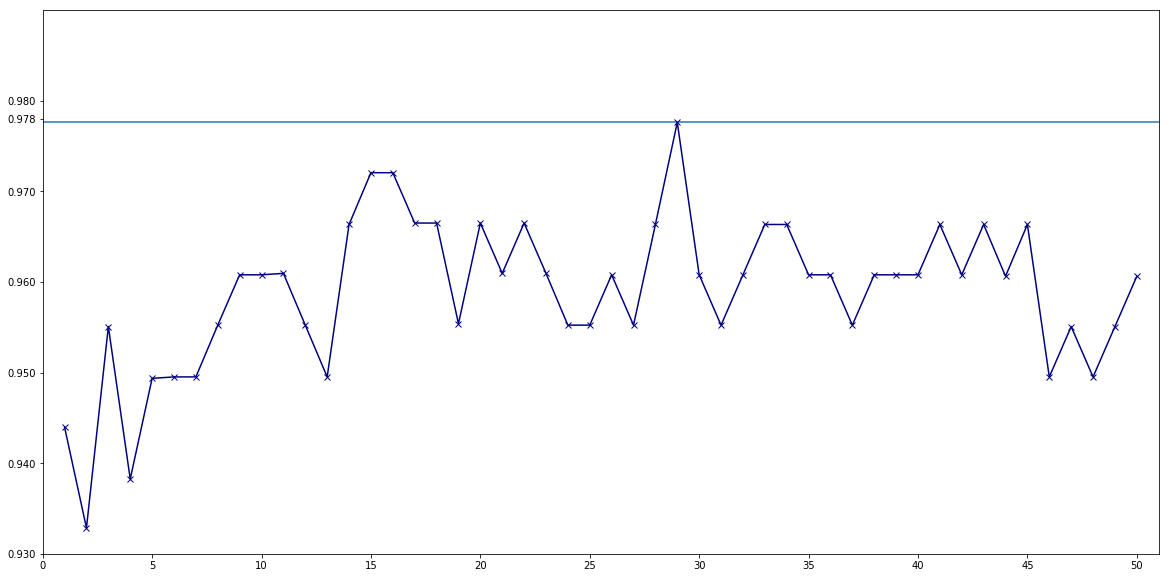

In [3]:
n_data = pd.DataFrame(sl.preprocessing.scale(data), columns = ["Alcohol", "Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"])
quality = find_best_k(50, n_data, answers, kf)
pyplot.figure(figsize=(20,10))
pyplot.yticks(np.append(np.arange(0.93, 0.99, 0.01),round(max(quality), 3)))
pyplot.xticks(np.arange(0,51,5))
pyplot.ylim((0.93,0.99))
pyplot.xlim((0,51))
print(max(quality))
pyplot.axhline(y=max(quality), xmin=0,xmax=1)
pyplot.plot(range(1,51), quality, color="navy", marker="x")
pyplot.show()